# Weather Notebook

The notebook will provide code snippets and explanations for each task, starting from creating directory structures to downloading weather data and processing it.

In [3]:
# Libraries
import pandas as pd # for data manipulation and analysis
import os
import matplotlib.pyplot as plt  # for data visualisation and graphical plotting
import seaborn as sns  # built on top of matplotlib with similar functionalities
import numpy as np # for mathematical operations on arrays.
import datetime

### Collecting the Data

`mkdir`......

1.Create Directory Structure

The following command created the data folder and timestamps and weather subdirectories.

```bash
mkdir -p computer_infrastructure/data/timestamps/weather
```


`date`.....

2.Timestamps

The `date` command generated timestamped files and appended them to now.txt file.

```bash
date + "%Y/%m/%d_%H:%M:%S>>now.txt
```
The output format is:
2024/12/07 14:30:00

3.Formatting Timestamps

This command generated timestamps and appended them onto formatted.txt file

```bash
date + "%Y%m%d_%H%M%S>>formatted.txt
```
Output format: 20241209_130003 (File created at 1:00:03 PM on December 09, 2024).


`touch`....

4.Creating Timestamped Files

This command created an empty file with a timestamped name using the `touch` command.

```bash
touch `date +"%Y%m%d_%H%M%S.txt"`
```
Output format: 20241025_222322.txt (File created at 10:23:22 PM on October 25, 2024.)

`wget`......

5.Dowloading Today's weather

This command downloads current weather using `wget`, and save it as **weather.json** in the data/weather directory .

```bash
wget -O weather.json" https://prodapi.metweb.ie/observations/athenry/today
```

6.Timestamp the Data in YYYYmmdd_HHMMSS.json Format

Modifying the downloaded weather file with a timestamped name.

```bash
wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today

```
Output format:20241201_221719.json (File created at 10:17:19 PM on December 01, 2024)

7. Write a Script

Bash scprits automate tasks

```bash

#!/bin/bash
date
echo "Downloading weather data"
wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today
echo "Weather data downloaded"

```

## Athenry Weather

### About the Dataset.

This weather dataset contains a list of observations for every hour of the current day for a synoptic station in Athenry, Co Galway.
Time values are Local times and the file is updated hourly. 

Values for each hour include: 

- Name
- Dry bulb temperature in whole degrees
- Weather description, Windspeed (kt)
- Cardinal Wind Direction
- Relative Humidity (%)
- Rainfall (mm)
- msl Pressure (mbar) 
- Day of the week
- Date
- Time of observation.

### Load data.

In [4]:
# Read in data
df = pd.read_json('data/weather/weather.json')
df.head(3)

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,6.0,46n,Light rain,"""Light rain """,4,-,E,90,99,0.01,1041.0,Wednesday,2024-11-13,00:00
1,Athenry,5.0,05n,Rain showers,"""Rain shower""",4,-,NE,45,99,0.01,1040.0,Wednesday,2024-11-13,01:00
2,Athenry,5.0,05n,Rain showers,"""Rain shower""",2,-,N,0,99,0.10,1040.0,Wednesday,2024-11-13,02:00


### Analysis

In [5]:
# Information about 
# the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   19 non-null     object        
 1   temperature            13 non-null     float64       
 2   symbol                 19 non-null     object        
 3   weatherDescription     19 non-null     object        
 4   text                   19 non-null     object        
 5   windSpeed              19 non-null     object        
 6   windGust               19 non-null     object        
 7   cardinalWindDirection  19 non-null     object        
 8   windDirection          19 non-null     int64         
 9   humidity               19 non-null     int64         
 10  rainfall               11 non-null     float64       
 11  pressure               13 non-null     float64       
 12  dayName                19 non-null     object        
 13  date   

In [ ]:
df.describe()

,temperature,windDirection,humidity,rainfall,pressure,date
count,13.000000,19.000000,19.000000,11.000000,13.000000,19
mean,5.846154,73.421053,26.052632,0.029091,1039.923077,2024-11-13 00:00:00
min,4.000000,0.000000,-99.000000,0.000000,1039.000000,2024-11-13 00:00:00
25%,5.000000,0.000000,-99.000000,0.000000,1040.000000,2024-11-13 00:00:00
50%,5.000000,45.000000,99.000000,0.000000,1040.000000,2024-11-13 00:00:00
75%,6.000000,135.000000,99.000000,0.055000,1040.000000,2024-11-13 00:00:00
max,9.000000,225.000000,99.000000,0.100000,1041.000000,2024-11-13 00:00:00
std,1.519109,82.446155,98.127736,0.045707,0.493548,NaN


Set 'date' column as index.

In [15]:
df.set_index('date', inplace=True)
df.head(3)

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,reportTime
date,,,,,,,,,,,,,,
2024-11-13,Athenry,6.0,46n,Light rain,"""Light rain """,4,-,E,90,99,0.01,1041.0,Wednesday,00:00
2024-11-13,Athenry,5.0,05n,Rain showers,"""Rain shower""",4,-,NE,45,99,0.01,1040.0,Wednesday,01:00
2024-11-13,Athenry,5.0,05n,Rain showers,"""Rain shower""",2,-,N,0,99,0.10,1040.0,Wednesday,02:00


### Data Cleaning

In [ ]:
# Check for missing values
print(df.isna().sum())

name                     0
temperature              6
symbol                   0
weatherDescription       0
text                     0
windSpeed                0
windGust                 0
cardinalWindDirection    0
windDirection            0
humidity                 0
rainfall                 8
pressure                 6
dayName                  0
date                     0
reportTime               0
dtype: int64


### Drop Null values

In [ ]:

# Dropping null values.
df.dropna(inplace = True)

# Check for Null values again
print(df.isnull().sum())


name                     0
temperature              0
symbol                   0
weatherDescription       0
text                     0
windSpeed                0
windGust                 0
cardinalWindDirection    0
windDirection            0
humidity                 0
rainfall                 0
pressure                 0
dayName                  0
date                     0
reportTime               0
dtype: int64


### Plotting

Temperature

<Axes: xlabel='reportTime', ylabel='temperature'>

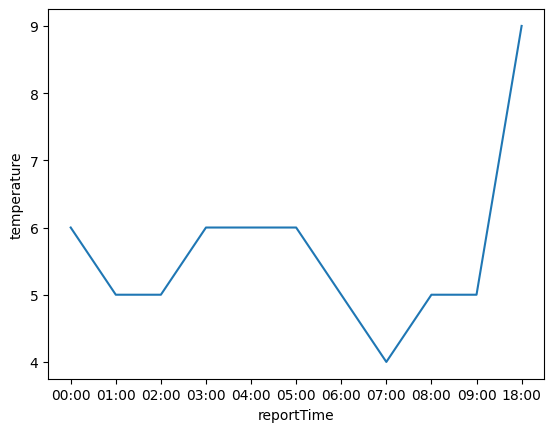

In [27]:
# Temperature for Wednesday
sns.lineplot(data=df, x='reportTime', y='temperature')

Windspeed

<Axes: xlabel='reportTime', ylabel='windSpeed'>

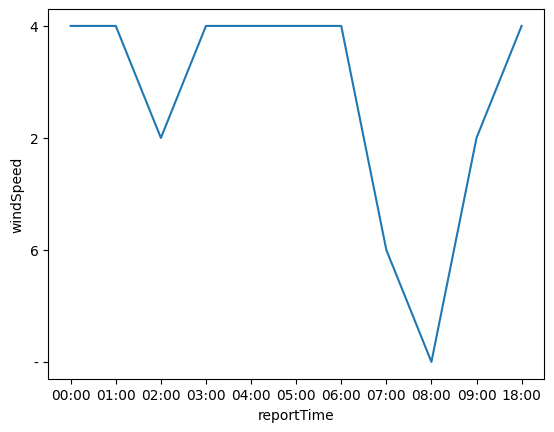

In [29]:
# Windspeed for Wednesday
sns.lineplot(data=df, x='reportTime', y='windSpeed')

## END